### Importing Nessecary Modules

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Task 2: Loading and Structuring Data

In [110]:
# loading data from csv into pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv')
data.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


The data is already structured into a tabular form when read using the read_csv method. There are some uneccrsary columns like the Unnamed: 0. For simple explorative analysis I'd just keep it to avoid obsufucation of the code, but for this excercise I'll remove them, to show I can.

Pandas was used because it's well-known, easy-to-use Python module which have been (more or less) optimised for work on large amounts of data. Therefore it is easy to get help on Stack Overflow and you quickly get a sense of how to use it correctly.

In [111]:
data.drop(['Unnamed: 0'], inplace = True, axis = 1)
# data.head()

### Task 3: Data Exploration

In [121]:
# exploration 1: bar plots of domains and classifications, are any sites more prone to Fake News than others?
classifications = pd.unique(data['type'])

for classification in classifications:
    data[classification] = data['type'].map({classification: 1})

barplot_df = data.groupby('domain')[classifications].sum()
print(barplot_df)


                           unreliable   fake  clickbait  conspiracy  reliable  \
domain                                                                          
21stcenturywire.com               0.0    0.0        0.0         1.0       0.0   
alternet.org                      0.0    0.0        0.0         0.0       0.0   
americanlookout.com               0.0    0.0        0.0         0.0       0.0   
anonhq.com                        1.0    0.0        0.0         0.0       0.0   
awarenessact.com                  0.0    0.0        0.0         6.0       0.0   
awm.com                           2.0    0.0        0.0         0.0       0.0   
barenakedislam.com                0.0    0.0        0.0         0.0       0.0   
beforeitsnews.com                 0.0  155.0        0.0         0.0       0.0   
bipartisanreport.com              0.0    0.0        1.0         0.0       0.0   
blackagendareport.com             1.0    0.0        0.0         0.0       0.0   
breakpoint.org              

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '21stcenturywire.com'),
  Text(1, 0, 'alternet.org'),
  Text(2, 0, 'americanlookout.com'),
  Text(3, 0, 'anonhq.com'),
  Text(4, 0, 'awarenessact.com'),
  Text(5, 0, 'awm.com'),
  Text(6, 0, 'barenakedislam.com'),
  Text(7, 0, 'beforeitsnews.com'),
  Text(8, 0, 'bipartisanreport.com'),
  Text(9, 0, 'blackagendareport.com'),
  Text(10, 0, 'breakpoint.org'),
  Text(11, 0, 'breitbart.com'),
  Text(12, 0, 'canadafreepress.com'),
  Text(13, 0, 'charismanews.com'),
  Text(14, 0, 'christianpost.com'),
  Text(15, 0, 'city-journal.org'),
  Text(16, 0, 'cnnnext.com'),
  Text(17, 0, 'collectivelyconscious.net'),
  Text(18, 0, 'nationalreview.com'),
  Text(19, 0, 'naturalnews.com'),
  Text(20, 0, 'strategic-culture.org'),
  Text(21, 0, 'undergroundhealth.com'),
  Text(22, 0, 'unz.com'),
  Text(23, 0, 'vdare.com'),
  Text(24, 0, 'wallstreetonparade.com')

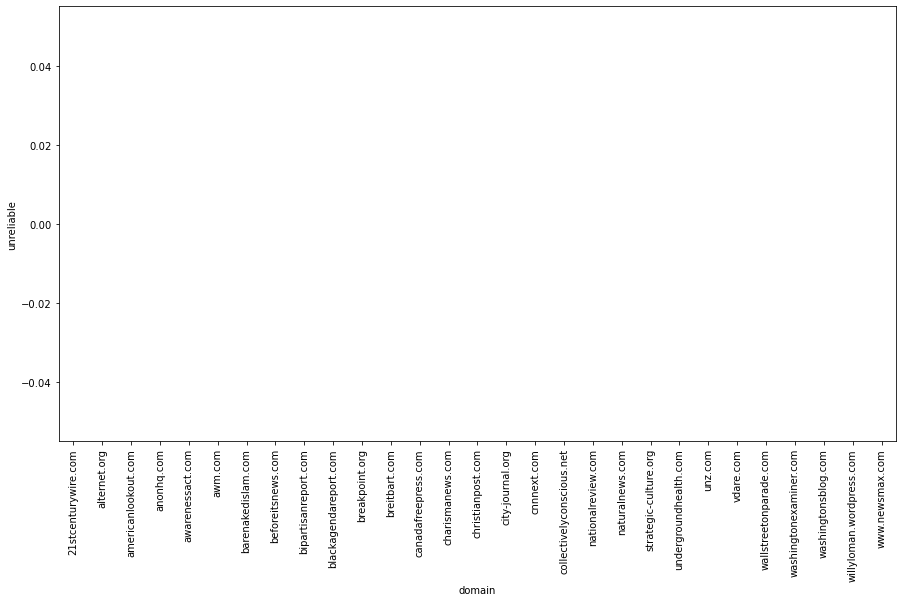

In [125]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x=barplot_df.reset_index()['domain'], y=barplot_df['unreliable'], data=data)
plt.xticks(rotation=90)

### Task 4: Scraping

In [ ]:
"https://en.wikinews.org/wiki/Category:Politics_and_conflicts)"